# Proyek Analisis Data: Air-quality-dataset
- **Nama:** geervan thanra
- **Email:** geervanthanra1@gmail.com
- **ID Dicoding:** geervanthanra

## Menentukan Pertanyaan Bisnis

- Apakah terdapat koneksi antara Pollutant PM10 dengan temparatur pada kota Tiantan?
- Bagaimana trend setiap jenis Pollutant pada tahun 2013-2017 pada kota Tiantan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Data Wrangling

### Gathering Data

In [ ]:
df = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")

In [ ]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


Step yang dilakukan :
- Import dataset kedalam Notebook menggunakan pandas
- diberikan nama df untuk CSV yang telah diimport

**Insight:**
- Dataset terdiri atas 5 jenis pollutant :
  - PM2.5
  - PM10
  - SO2
  - NO2
  - CO

- Dataset merupakan pengukuran kualitas udara kota Tiantan yang dilakukan per jam selama tahun 2013 - 2017 yang mengandung pengukuran pollutan, tekanan udara, temperatur, dan fitur - fitur pelengkap lainnya



### Assessing Data

In [ ]:
#Tiantan city
df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Step yang dilakukan :
- Mencari jika terdapat nilai null dalam dataset menggunakan .isna().sum(), dimana terdeteksi terdapat nilai null dalam dataset
- Mencari jika terdapat nilai duplicated dalam dataset menggunakan .duplicated().sum(), dimana tidak terdapat nilai duplicate
- Melihat deskripsi singkat serta informasi mengenai dataset yang dipakai


**Insight**
- Masih terdapat banyak row yang berisi nilai Null
- Harus diubah menjadi Datetime

### Cleaning Data

In [ ]:
df = df.fillna(method='ffill')

<ipython-input-31-2c428d02cf67>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [ ]:
dates = ["year", "month", "day", "hour"]
order = [ "datetime", "PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "WSPM"]

df["datetime"] = pd.to_datetime(df[dates])
df = df[order]

In [ ]:
df.set_index('datetime', inplace=True)
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
datetime,,,,,,,,,,
2013-03-01 00:00:00,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,5.7
2013-03-01 01:00:00,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,3.9
2013-03-01 02:00:00,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,5.3
2013-03-01 03:00:00,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,4.9
2013-03-01 04:00:00,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,3.2
...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,20.0,48.0,2.0,21.0,500.0,94.0,12.5,1013.5,-16.2,2.4
2017-02-28 20:00:00,11.0,34.0,3.0,36.0,500.0,94.0,11.6,1013.6,-15.1,0.9
2017-02-28 21:00:00,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,1.1


In [ ]:
df.isnull().sum()

,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0
DEWP,0
WSPM,0


Step yang dilakukan :
- Row yang terdeteksi memiliki nilai Null diisikan
- Menghapuskan coloumn data yang tidak diperlukan dalam analisis

**Insight:**
- Diubah dari kolom year, month, day, hour menjadi datetime untuk mempermudah analisa selanjutnya
- Nilai yang hilang dalam kumpulan data telah diatasi menggunakan metode forward fill (ffill), yang mengisi entri yang hilang dengan menyebarkan observasi valid terakhir ke depan. Pendekatan ini mengasumsikan bahwa pengukuran berikutnya tetap sama hingga nilai valid baru dicatat, sehingga berguna untuk data deret waktu yang membutuhkan kontinuitas.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
datetime,,,,,,,,,,
2013-03-01 00:00:00,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,5.7
2013-03-01 01:00:00,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,3.9
2013-03-01 02:00:00,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,5.3
2013-03-01 03:00:00,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,4.9
2013-03-01 04:00:00,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,3.2
...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,20.0,48.0,2.0,21.0,500.0,94.0,12.5,1013.5,-16.2,2.4
2017-02-28 20:00:00,11.0,34.0,3.0,36.0,500.0,94.0,11.6,1013.6,-15.1,0.9
2017-02-28 21:00:00,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,1.1


In [ ]:
df.describe(include = "all")

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,82.255892,106.657004,14.475397,53.237608,1308.279318,56.464766,13.668746,1012.551858,2.445117,1.860712
std,81.130568,90.433491,20.508332,31.999587,1184.456071,60.844059,11.460066,10.266719,13.812242,1.280429
min,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000
25%,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,1.000000
50%,58.000000,85.000000,7.000000,47.000000,900.000000,41.000000,14.600000,1012.200000,3.000000,1.500000
75%,114.000000,144.000000,17.000000,71.000000,1600.000000,82.000000,23.500000,1020.900000,15.000000,2.400000
max,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,10.500000


In [ ]:
#resample df berdasarkan bulannya
df_monthly = df.resample('M').mean()
df_monthly.head()

<ipython-input-37-c0b51c744256>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
datetime,,,,,,,,,,
2013-03-31,106.228495,123.461022,37.718063,64.045248,1558.427419,63.548901,6.256989,1014.456855,-7.030511,1.969624
2013-04-30,60.944444,90.766667,21.263254,43.594327,984.637500,76.540954,12.632361,1009.933056,-3.778056,2.571389
2013-05-31,80.490591,138.193548,26.998656,42.267473,1097.356183,81.729872,21.929301,1004.748253,7.802957,1.997177
2013-06-30,110.538889,133.738889,15.279959,48.787583,1442.623611,74.805719,23.823611,1001.637222,17.216250,1.468056
2013-07-31,69.305108,84.125000,6.993353,43.394548,1071.215054,77.739515,27.485215,997.453898,20.801210,1.475403


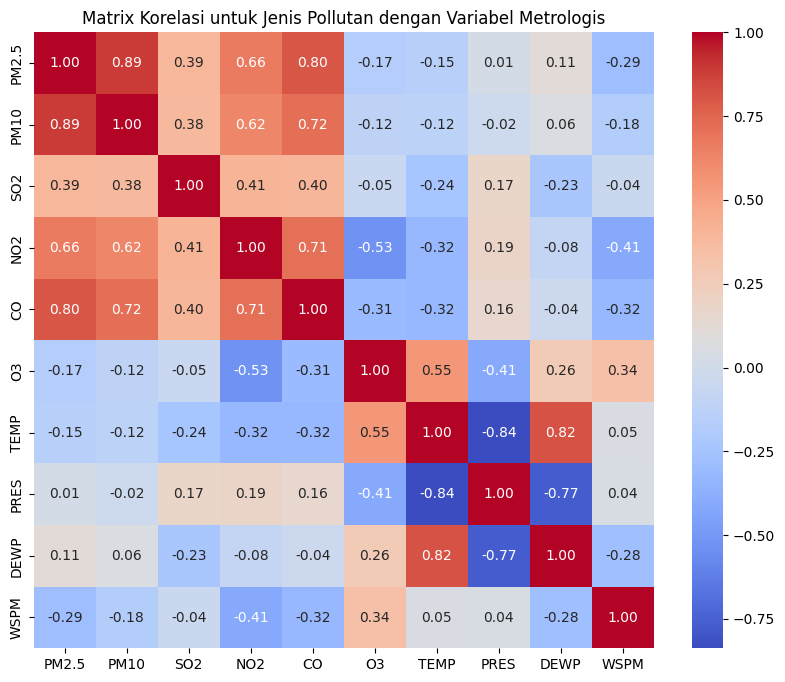

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Matrix Korelasi untuk Jenis Pollutan dengan Variabel Metrologis')
plt.show()

Steps yang dilakukan :
- Data telah diresample menjadi per bulan
- Dibuat deskripsi data dataset
- Dibuat korelasi matriks fitur pada dataset tersebut

**Insight:**
- Dibuat versi yang perbulan untuk melihat trend fitur dalam bulan dalam tahap Analysis
- Range data untuk setiap jenis pollutan :
  - PM2.5 : 3 - 821, mean : 82.25
  - PM10 : 2 - 988, mean : 106.65
  - SO2 : 0.57 - 273, mean : 14.47
  - NO2 : 2 - 241, mean : 53.27
  - CO : 100 - 10000, mean : 1308.27

  dan untuk temperatur : -16.80 - 41.10, mean : 13.66
- Dapat diperhatikan bahwa range pollutan cukup bervariatas

- Dapat diperhatikan bahwa jenis pollutan PM2.5, PM10, SO2, NO2, dan CO memiliki korelasi dari range 0.38 - 0.89. Artinya fitur - fitur tersebut memiliki korelasi yang cukup baik dan bersifat positif

- Sedangkan, temperatur memiliki korelasi negatif terhadap PM2.5, PM10, SO2, NO2, dan CO. Berarti diindikasi bahwa semakin tinggi nilai pollutan tersebut, semakin kecil nilai temperatur dan vice versa

- Temperatur memiliki korelasi positif yang cukup baik dengan nilai O3

- WSPM (wind speed) memiliki korelasi negatif terhadap jenis - jenis pollutan PM2.5, PM10, SO2, NO2, dan CO. Hal ini mungkin berarti kecepatan angin yang lebih tinggi mungkin membantu menyebarkan pollutan ini.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat koneksi antara Pollutant PM10 dengan temparatur pada kota Tiantan?

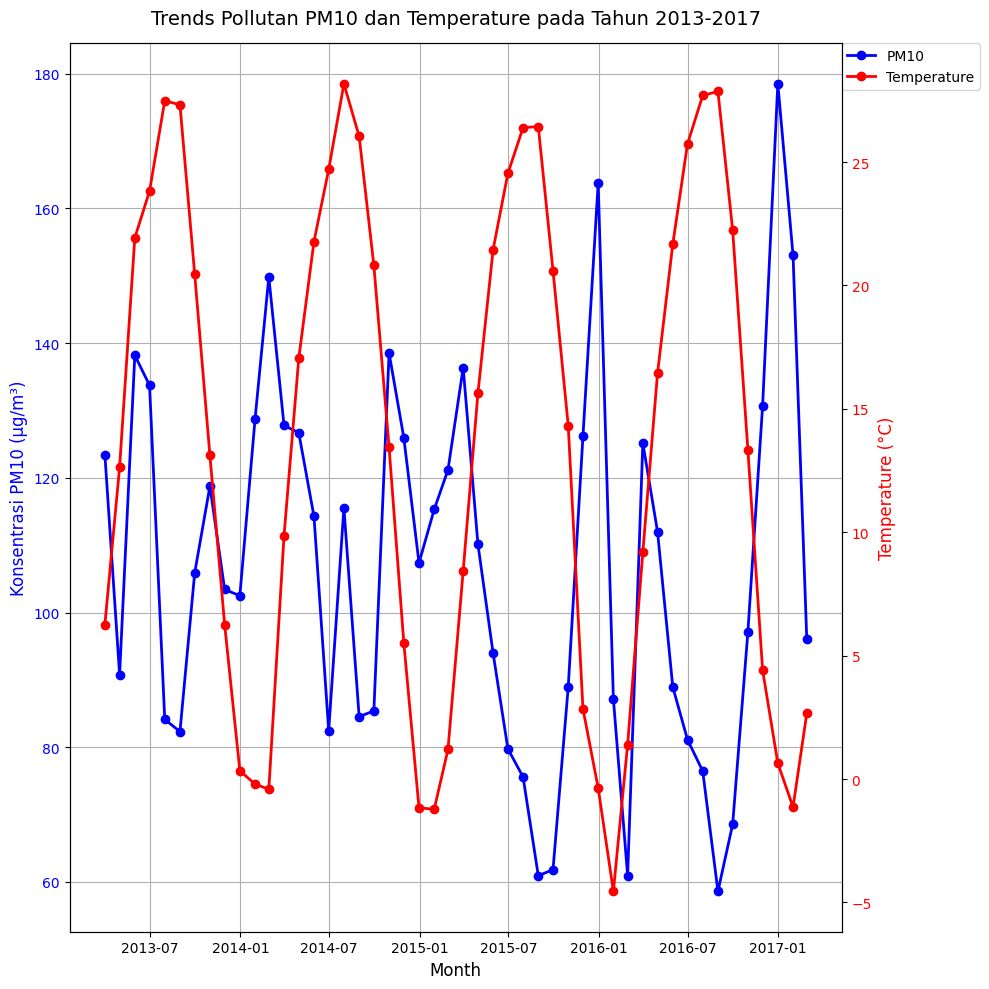

In [ ]:
# Apakah terdapat koneksi antara Pollutant PM10 dengan temparatur pada kota Tiantan?
fig, ax1 = plt.subplots(figsize=(10, 10))

line1 = ax1.plot(df_monthly.index, df_monthly["PM10"], label='PM10', linewidth=2, color='blue', marker='o')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Konsentrasi PM10 (µg/m³)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

ax2 = ax1.twinx()
lineTemp = ax2.plot(df_monthly.index, df_monthly["TEMP"], label='Temperature', linewidth=2, color='red', marker='o')
ax2.set_ylabel('Temperature (°C)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')


plt.title('Trends Pollutan PM10 dan Temperature pada Tahun 2013-2017', fontsize=14, pad=14)
lines_total = line1 + lineTemp
labels = [l.get_label() for l in lines_total]

ax1.legend(lines_total, labels, loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)

fig.tight_layout()
plt.show()

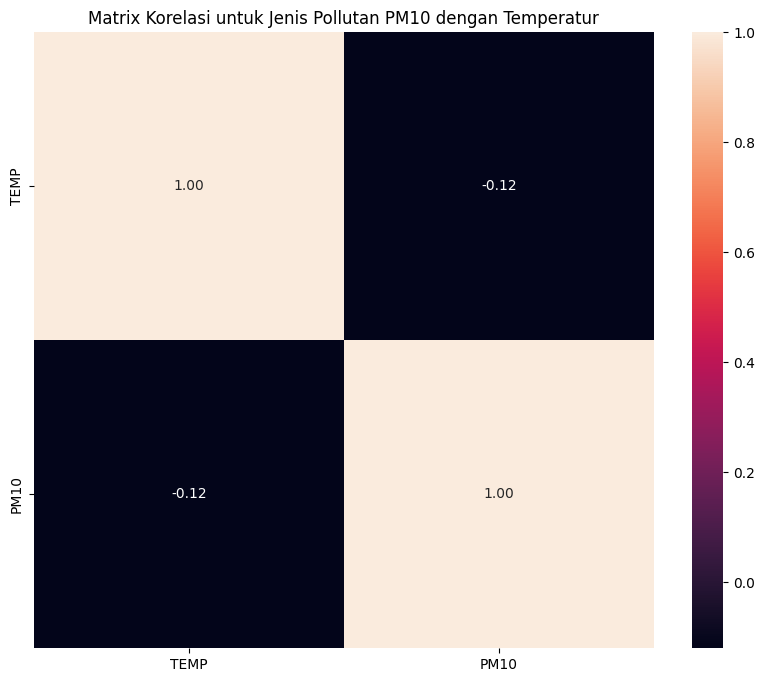

In [ ]:
corr_matrix = df[["TEMP", "PM10"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Matrix Korelasi untuk Jenis Pollutan PM10 dengan Temperatur')
plt.show()

- Berdasarkan grafik diatas, dapat diperlihat bahwa terdapat korelasi lemah antara temperatur dengan Pollutan PM10.

- Terdapat kenaikan cukup drastis pada pollutan PM10 pada tahun Januaru 2016 dan 2017

- Kenaikan temperatur bersifat fluktuatif, sesuai dengan musim

Diagram scatter dan matriks korelasi mengonfirmasi bahwa tidak ada hubungan langsung yang signifikan antara kedua variabel selama periode yang diamati.

### Pertanyaan 2: Bagaimana trend setiap jenis Pollutant pada tahun 2013-2017 pada kota Tiantan?

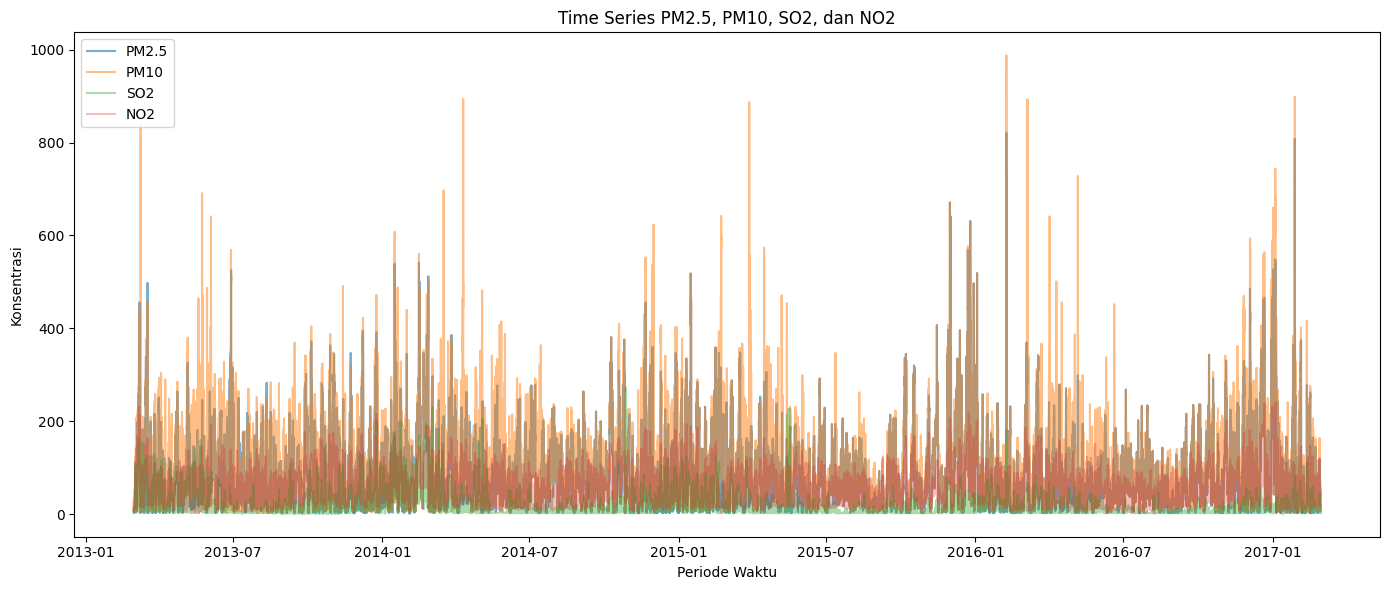

In [ ]:
# Bagaimana trend setiap jenis Pollutant pada tahun 2013-2017 pada kota Tiantan?
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['PM2.5'], label='PM2.5', alpha=0.6)
plt.plot(df.index, df['PM10'], label='PM10', alpha=0.5)
plt.plot(df.index, df['SO2'], label='SO2', alpha=0.4)
plt.plot(df.index, df['NO2'], label='NO2', alpha=0.3)

plt.title('Time Series PM2.5, PM10, SO2, dan NO2')
plt.xlabel('Periode Waktu')
plt.ylabel('Konsentrasi')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
def plot_pollutant(pollutant):
  plt.figure(figsize=(10, 6))
  plt.plot(df_monthly.index, df_monthly[pollutant],
          label=pollutant,
          linewidth=1.5,
          color='red',
          markersize=6,
          marker='o',
          markerfacecolor='white',
          markeredgewidth=1.5,
          markeredgecolor='royalblue')

  plt.title(f'Rata - Rata Pollutan {pollutant} di Tiantan', fontsize=14, pad=14)
  plt.xlabel('Periode (Month-Year)', fontsize=12, labelpad=12)
  plt.ylabel(f'Konsentrasi {pollutant} (µg/m³)', fontsize=12, labelpad=12)
  plt.ylim(0, df_monthly[pollutant].max() * 1.1)
  plt.legend(loc='upper right', frameon=False, fontsize=12)
  plt.grid(True, which='both', linestyle='--', linewidth=0.5)

  plt.tight_layout()
  plt.show()

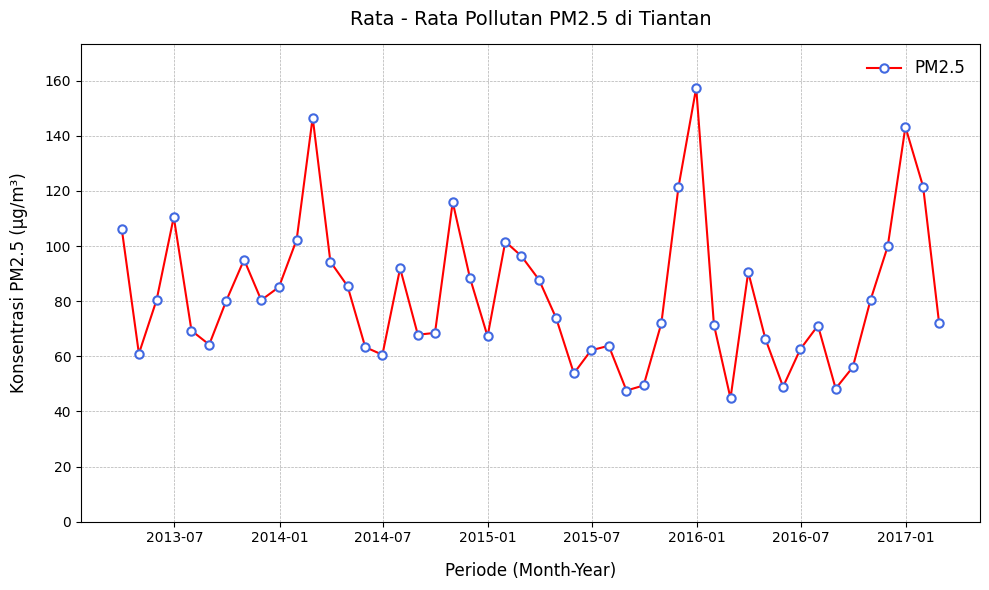

In [ ]:
plot_pollutant("PM2.5")

**Deskripsi**
- Dapat diperhatikan bahwa terdapat kenaikan drastis pada Januari 2016
- Terdapat puncak pada pertengahan 2014, Januari 2016, dan Januari 2017
- Pada awal pertengahan 2016 terdapat penurunan yang cukup drastis

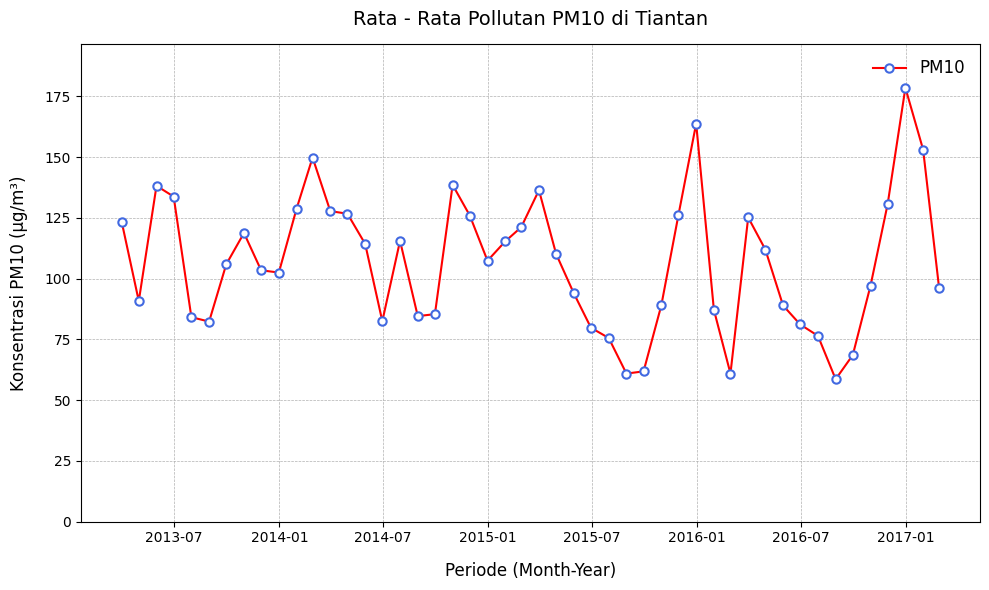

In [ ]:
plot_pollutant("PM10")

**Deskripsi**
- Trend cukup mirip dengan PM2.5
- Memiliki puncak pada pertengah 2014, Januari 2016, dan Januari 2017 juga

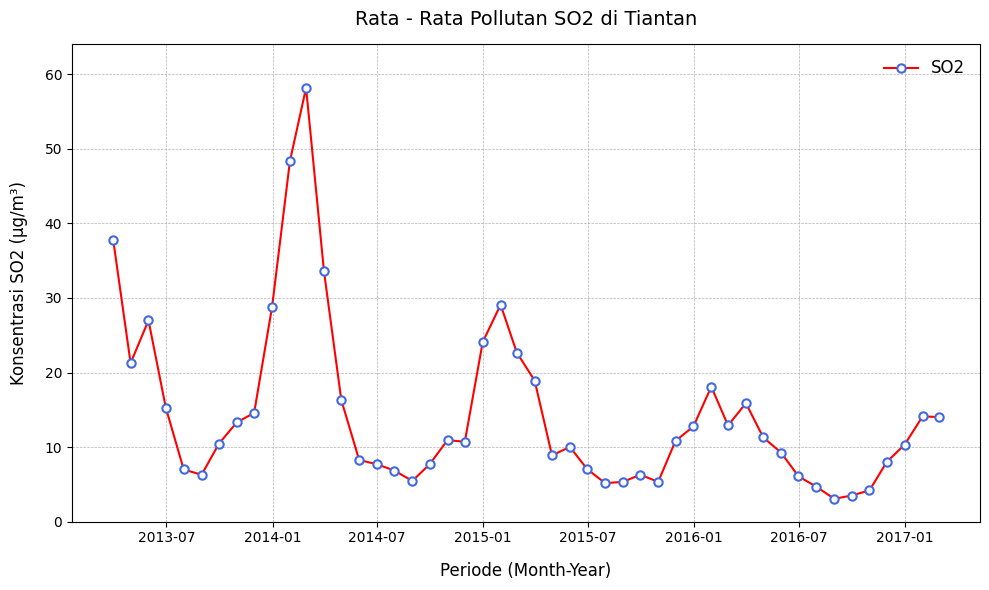

In [ ]:
plot_pollutant("SO2")

**Deskripsi**
- Mengalami penurunan secara keseluruhan
- Puncak terdapat pada pertengahan 2014

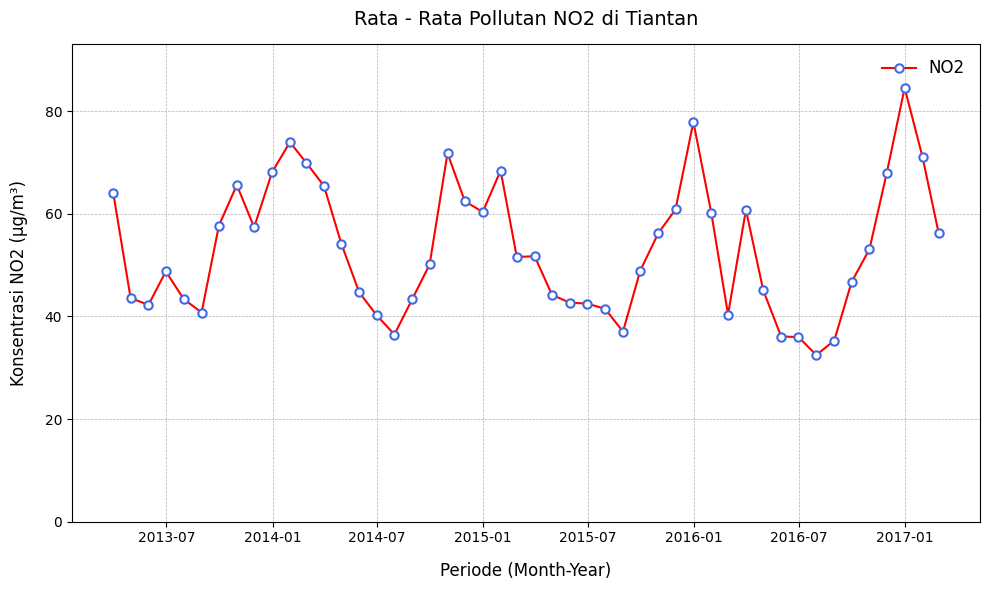

In [ ]:
plot_pollutant("NO2")

**Deskripsi**
- Terdapat puncak pada pertengahan 2014, Januari 2016, dan Januari 2017 juga

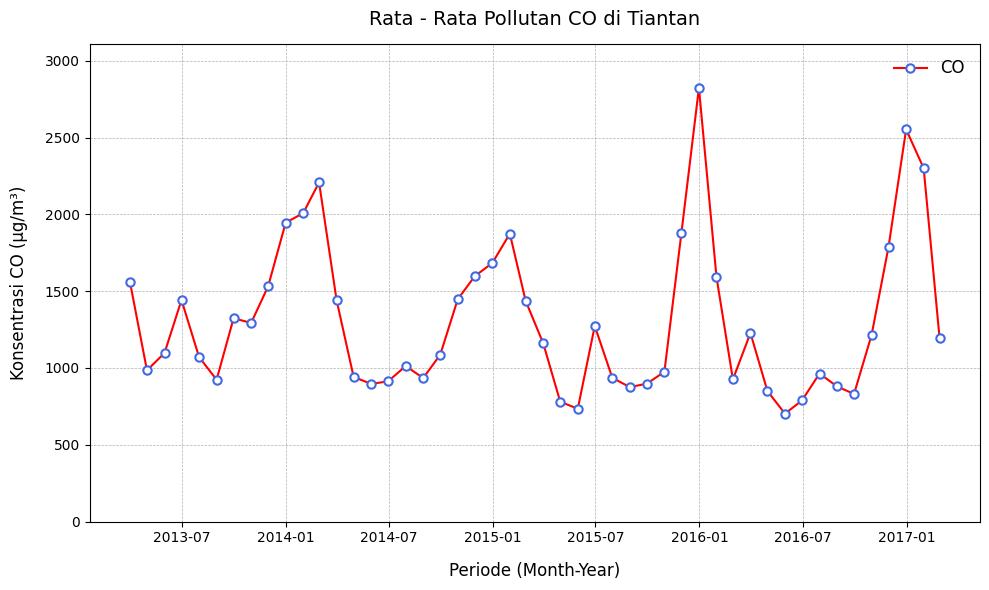

In [ ]:
plot_pollutant("CO")

**Deskripsi**
- Memiliki konsentrasi sangat tinggi
- Juga memiliki puncak pada pertengahan 2014, Januari 2016, dan Januari 2017

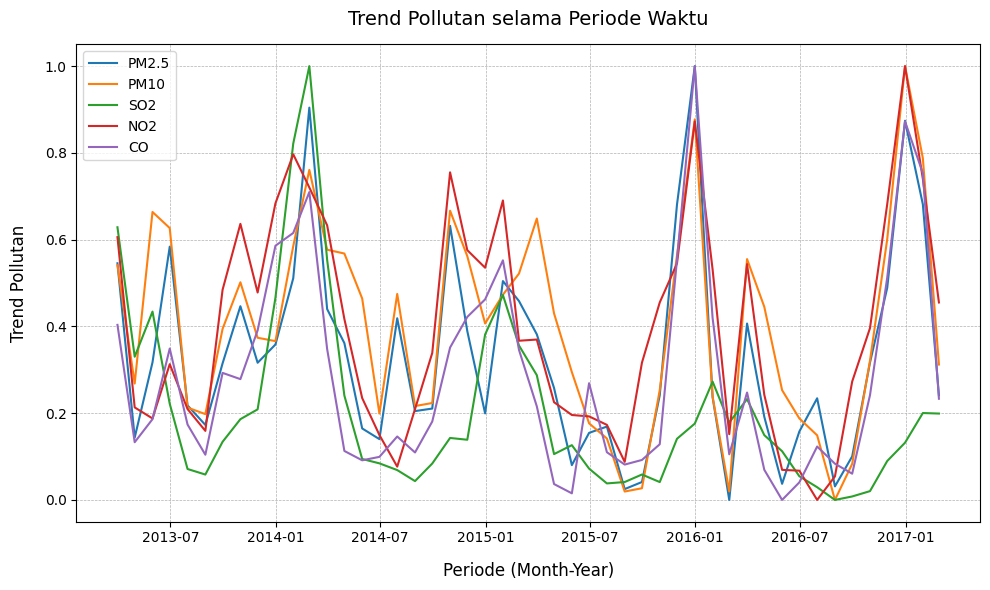

In [ ]:
#scaling data agar dalam jangka data yang sama
#tujuan ini hanya untuk melihat trend perkembangan semua jenis pollutan
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_monthly[["PM2.5", "PM10", "SO2", "NO2", "CO"]])
df_scaled = pd.DataFrame(df_scaled, columns=["PM2.5", "PM10", "SO2", "NO2", "CO"])

plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_scaled["PM2.5"], label = "PM2.5")
plt.plot(df_monthly.index, df_scaled["PM10"], label ="PM10")
plt.plot(df_monthly.index, df_scaled["SO2"], label ="SO2")
plt.plot(df_monthly.index, df_scaled["NO2"], label ="NO2")
plt.plot(df_monthly.index, df_scaled["CO"], label = "CO")

plt.title(f'Trend Pollutan selama Periode Waktu', fontsize=14, pad=14)
plt.xlabel('Periode (Month-Year)', fontsize=12, labelpad=12)
plt.ylabel(f'Trend Pollutan', fontsize=12, labelpad=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

**Deskripsi**
- MinMaxScaler adalah salah satu teknik normalisasi data dalam machine learning yang berfungsi untuk mengubah skala nilai dalam dataset agar berada dalam rentang tertentu, biasanya antara 0 dan 1.
- Tujuan grafik ini adalah dalam melihat trend semua jenis pollutan pada jangka waktu yang sama
- Dapat diperhatikan bahwa semua jenis pollutan memiliki puncak pada pertengahan 2014

**Insight:**
- Terdapat korelasi sangat lemah antara temperatur dengan pollutan PM10
- Setiap jenis pollutan memiliki kenaikan dan penurunan yang berbeda, tetapi beberapa memiliki puncak yang sama pada periode tertentu

## Conclusion

- Conclution pertanyaan 1 <br>
Korelasi antara suhu dan PM10 ditemukan lemah, yang menunjukkan bahwa suhu saja tidak memiliki pengaruh yang kuat terhadap konsentrasi PM10. Hal ini mengindikasikan bahwa faktor lain, seperti emisi dari aktivitas industri, lalu lintas kendaraan, dan variasi musiman dalam pemanasan, memiliki peran yang lebih signifikan terhadap tingkat PM10 dibandingkan dengan perubahan suhu.
<br>

- Conclution pertanyaan 2 <br>
Meskipun setiap jenis polutan memiliki perbedaan dalam pola kenaikan dan penurunan, terdapat kesamaan dalam puncak data pada periode yang sama, yaitu antara 01-2014 hingga 07-2014. Walaupun tren beberapa jenis polutan serupa, jumlah polutan yang terdeteksi dalam satuan µg/m³ bervariasi, dengan polutan CO memiliki konsentrasi tertinggi.